<a href="https://colab.research.google.com/github/waraporn19/KKU_data_mining/blob/master/K_mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate Data

In [2]:
from sklearn.datasets import make_blobs #สุ่ม Data ขึ้นมา

In [3]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=6)

In [4]:
X.shape # 300 แถว  2 colume

(300, 2)

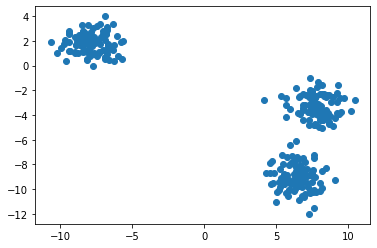

In [6]:
from matplotlib import  pyplot as plt
plt.scatter(X[:,0],X[:,1])

#Import

In [8]:
from sklearn.cluster import KMeans

#Define  #กำหนดพารามิเตอร์ 

In [9]:
KMclust = KMeans(n_clusters=2)  #กำหนดกลุ่ม  เช่น กำหนดให้ 2 กลุ่ม

#Train จัดกลุ่ม

In [10]:
KMclust.fit(X) #จัดกลุ่มให้ X

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#Predict ทำนาย

In [11]:
label = KMclust.predict(X) #predict จัดกลุ่มว่าอยู่กลุ่มไหน

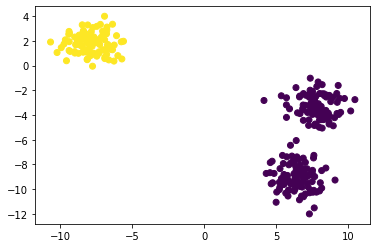

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=label)

#Color quanจัดกลุ่มสี

In [27]:
from google.colab import drive  #ดึงข้อมูลจาก google drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import cv2 #เกี่ยวกับรูปภาพ
import  os # เพื่อจัดการเกี่ยวกับไฟล์

In [29]:
img = cv2.imread(os.path.join(path, 'baboon.jpg' ))

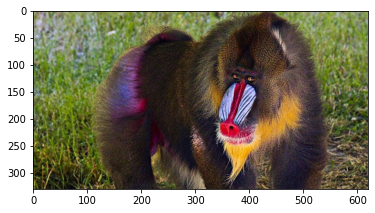

In [30]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [31]:
RGB_img.shape # ความยาว 

(330, 620, 3)

#count 

In [32]:
import numpy as np

In [33]:
np.unique(RGB_img).shape

(256,)

#Use K-mean to reduce color from 256 color to 8 colors

In [34]:
#Define
myQuantize = KMeans(n_clusters=8)

In [41]:
img_row = np.reshape(RGB_img,(330*620, 3)) # row=1724 culum=3
img_row

array([[158, 168, 108],
       [159, 168, 111],
       [149, 155, 107],
       ...,
       [103,  87,  53],
       [111,  97,  60],
       [ 82,  68,  29]], dtype=uint8)

In [43]:
#Train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
#Predict
res = myQuantize.predict(img_row)

In [46]:
res

array([2, 2, 2, ..., 3, 3, 1], dtype=int32)

#Get cluster centers

In [47]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[125.54073416, 133.99179988,  75.11465364],
       [ 65.24476391,  52.60783076,  40.78214119],
       [147.44798084, 152.89454385, 118.74611323],
       [102.38994156,  78.11722444,  76.14421323],
       [181.56050823, 178.62653614, 194.64278275],
       [ 34.58626036,  25.25889479,  24.13181452],
       [218.03942325, 154.00748312,  65.18890308],
       [ 94.41369155, 107.29535158,  34.32194636]])

In [49]:
Clus_cen.shape

(8, 3)

## Map caolor name back to imag

In [56]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
     for j in range(RGB_img.shape[1]):
          new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]), :]

In [60]:
new_img_ =new_img/255 


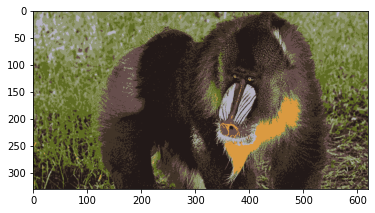

In [63]:
plt.imshow(new_img_)